We first create an example dataset for the ``AAclustPlot().medoids()``, which visualizes 'medoids' as obtained by the ``AAclust().comp_medoids()`` method:


In [11]:
from sklearn.decomposition import PCA, KernelPCA, FastICA, TruncatedSVD, NMF
import matplotlib.pyplot as plt
import aaanalysis as aa
aa.options["verbose"] = False
# Obtain example scale dataset 
df_scales = aa.load_scales()
X = df_scales.T
# Fit AAclust model retrieve labels to compute centers
aac = aa.AAclust()
labels = aac.fit(X, n_clusters=5).labels_

All data points are visualized in the PCA plot including the cluster representative samples ('medoids') highlighted by a bigger dot:

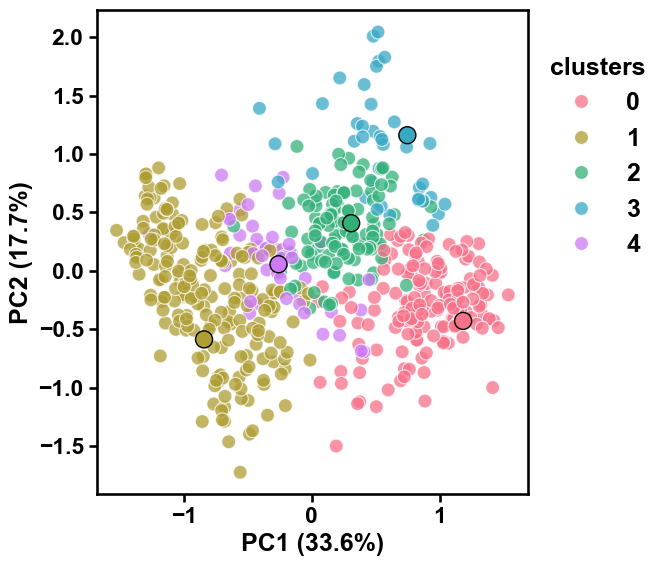

DataFrame shape: (586, 2)


,PC1 (33.6%),PC2 (17.7%)
1,-0.181000,0.580000
2,0.824000,-0.592000
3,0.724000,-0.838000
4,0.861000,-0.746000
5,0.645000,0.481000
6,1.266000,-0.149000
7,-0.753000,0.413000
8,-1.074000,0.348000
9,0.501000,0.262000
10,1.304000,-0.139000


In [12]:
aac_plot = aa.AAclustPlot(model_class=PCA)
aa.plot_settings()
ax, df_components = aac_plot.medoids(X, labels=labels)
plt.show()
# DataFrame for respective components are returned
aa.display_df(df_components, n_rows=10, show_shape=True)

Select other PCs using the ``component_x`` and ``component_y`` parameters:

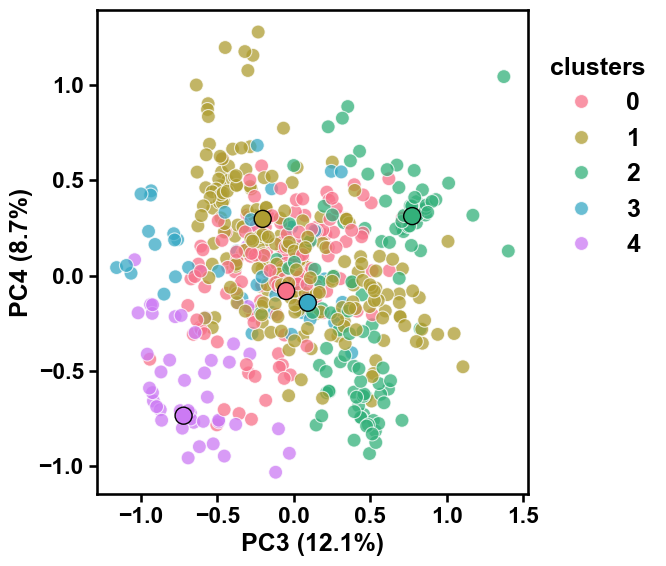

In [13]:
aac_plot.medoids(X, labels=labels, component_x=3, component_y=4)
plt.show()

Medoids can be obtained using different kinds of ``metric``. To compare them in a single plot, you can use the ``ax`` and ``legend`` parameters:

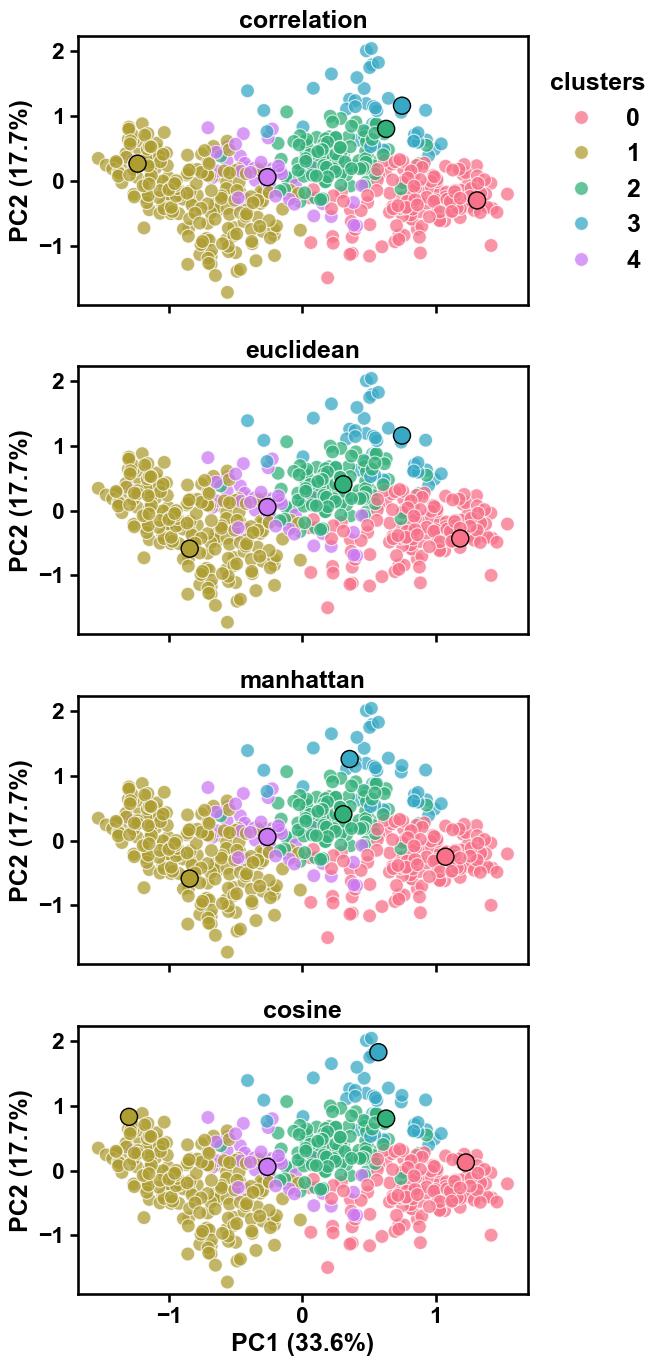

In [14]:
list_metrics = ["correlation", "euclidean", "manhattan", "cosine"]
fig, axes = plt.subplots(4, 1, figsize=(7, 14), sharex=True, sharey=True)
for i, metric in enumerate(list_metrics):
    ax = axes[i]
    # Set legend only for first subplot
    aac_plot.medoids(X, labels=labels, ax=ax, legend=i==0, metric=metric)
    ax.set_title(metric)
plt.tight_layout()
plt.show()
plt.close()
    

Adjust the style of the scatter plot using the ``dot_size`` and ``dot_alpha`` arguments to change the size of the dots and their transparency: 

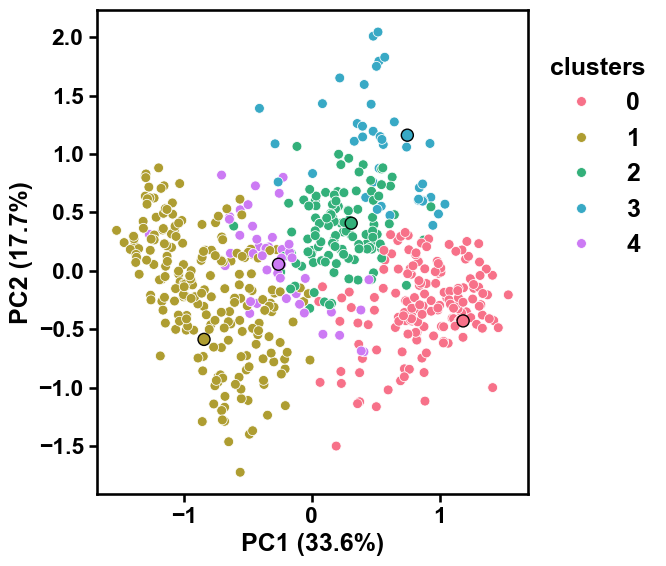

In [15]:
aac_plot = aa.AAclustPlot(model_class=PCA)
aac_plot.medoids(X, labels=labels, dot_size=50, dot_alpha=1)
plt.show()

The cluster colors can be adjusted by the ``palette`` argument by providing either a list of colors or a color map: 

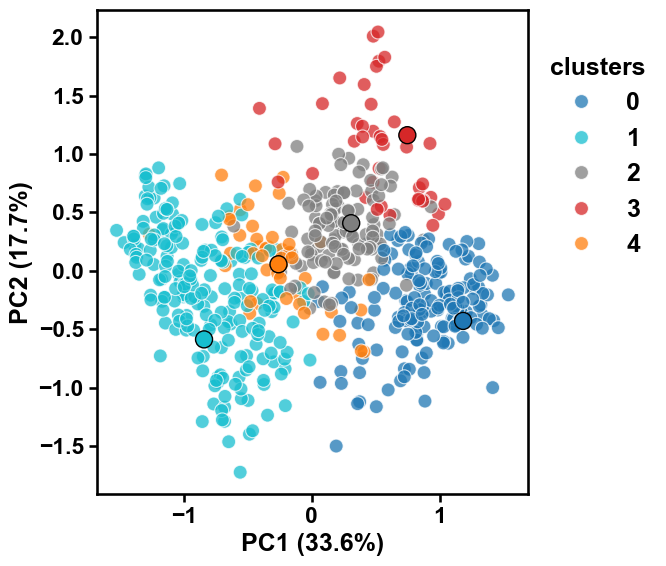

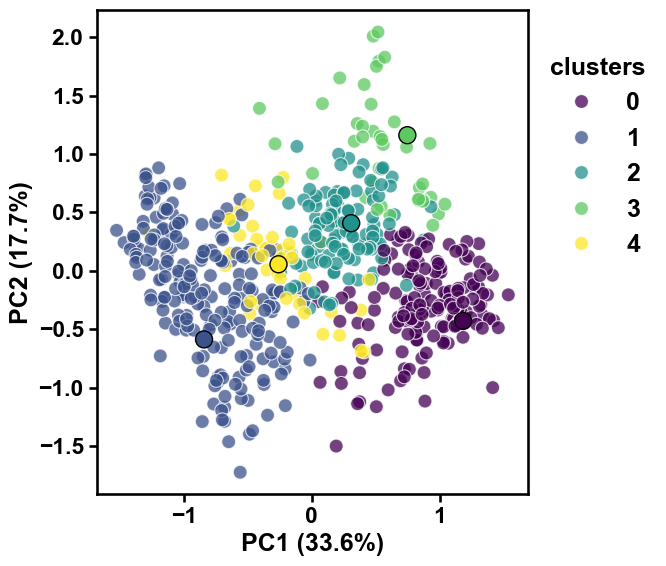

In [16]:
colors = aa.plot_get_clist(n_colors=5)
aac_plot.medoids(X, labels=labels, palette=colors)
plt.show()
aac_plot.medoids(X, labels=labels, palette="viridis")
plt.show()